In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

In [3]:
import jax
from housemaze import maze
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image_dict = utils.load_image_dict()

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl


In [5]:
char2key, task_group_set, task_objects = mazes.get_group_set(3)
char2key

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


{'A': np.int32(26),
 'B': np.int32(40),
 'C': np.int32(47),
 'D': np.int32(43),
 'E': np.int32(25),
 'F': np.int32(30),
 'G': np.int32(29),
 'H': np.int32(27)}

((224, 256, 3),
 ['empty', 'wall', 'apple_sliced', 'spoon', 'onion_sliced_cooked'])

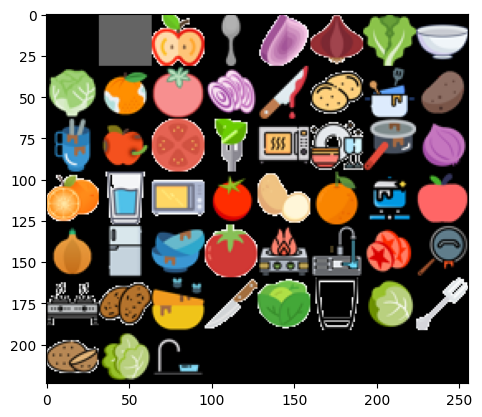

In [6]:
image = renderer.create_image_grid_from_image_tensor(image_dict['images'], max_cols=8)
plt.imshow(image)

image.shape, image_dict['keys'][:5]

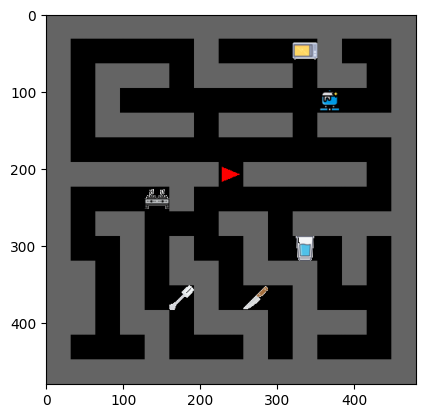

In [7]:
def render_maze(maze_str):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(*level_init, image_dict)
    plt.imshow(image)
    plt.show()

def render_path(maze_str, goal):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(*level_init, image_dict)
    path = utils.find_optimal_path(level_init[0], level_init[1], np.array([goal]))
    print(f"Path length: {len(path)}")
    actions = utils.actions_from_path(path)
    renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2])
    plt.show()

render_maze(mazes.maze0)
# render_maze(mazes.maze1)
# render_maze(mazes.maze2)
# render_maze(mazes.maze3)
# render_maze(mazes.maze4)

In [8]:
import experiment_1 as experiment

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Compiling jax environment functions.
	time: 1.4137799739837646
Compiling multi-render function.
	time: 0.060176849365234375


# Manipulation 1:

## shortcut

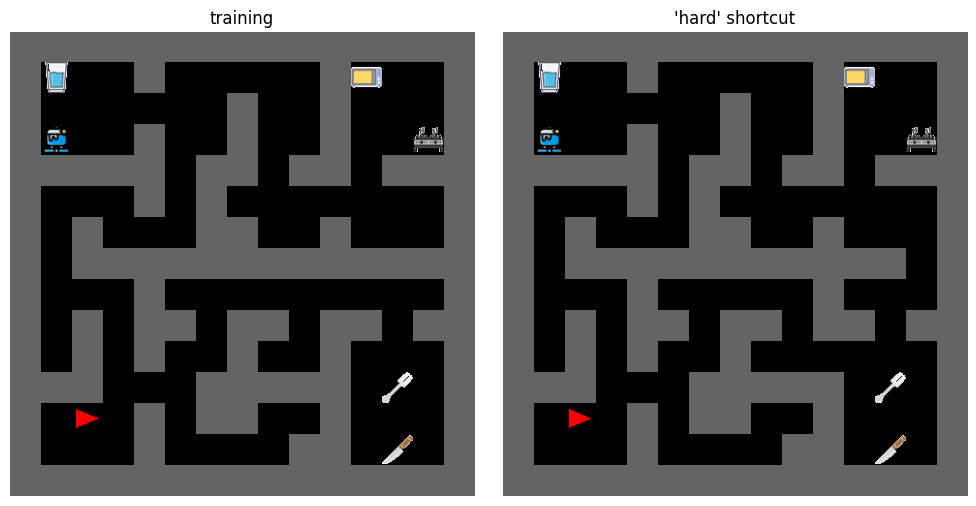

# Manipulation 2:

## faster when on-path but further than off-path but closer

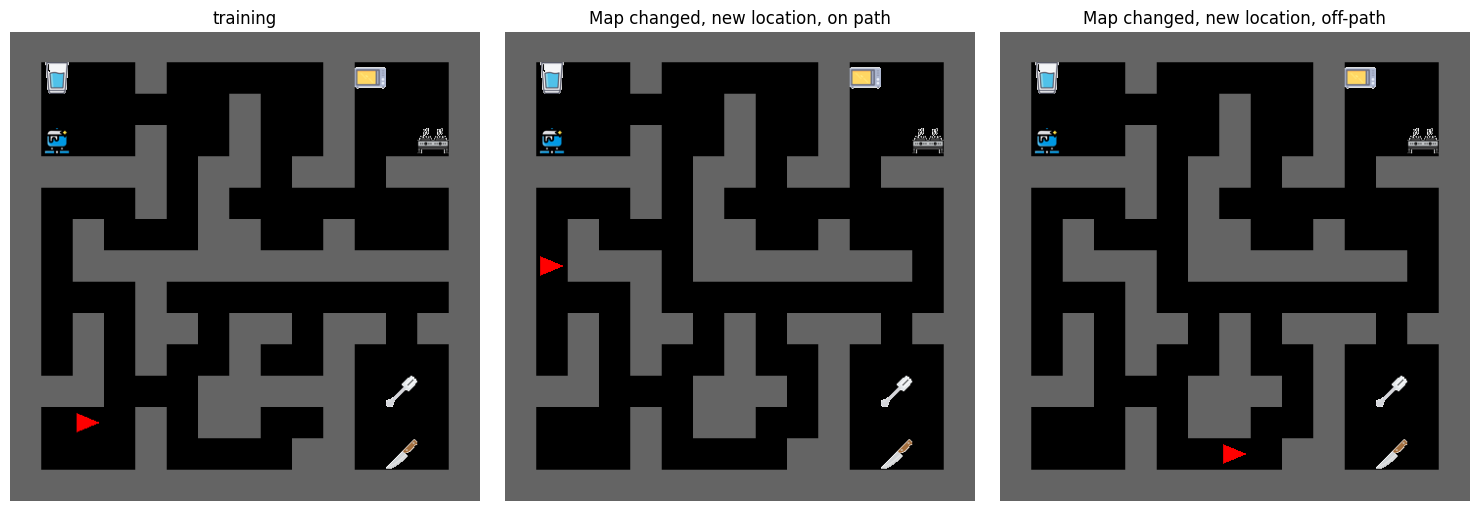

# Manipulation 3:

## reusing longer of two paths matching training path

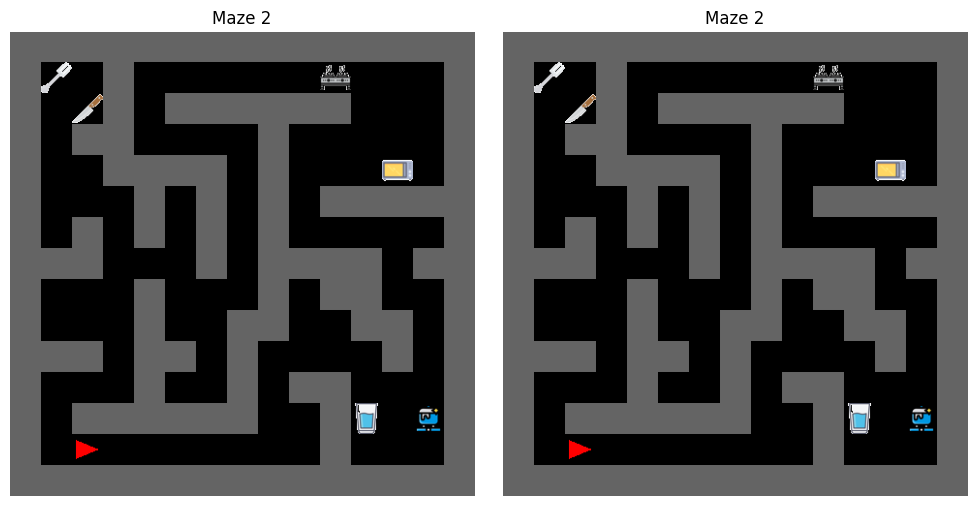

# Manipulation 4:

## probing for planning near goal

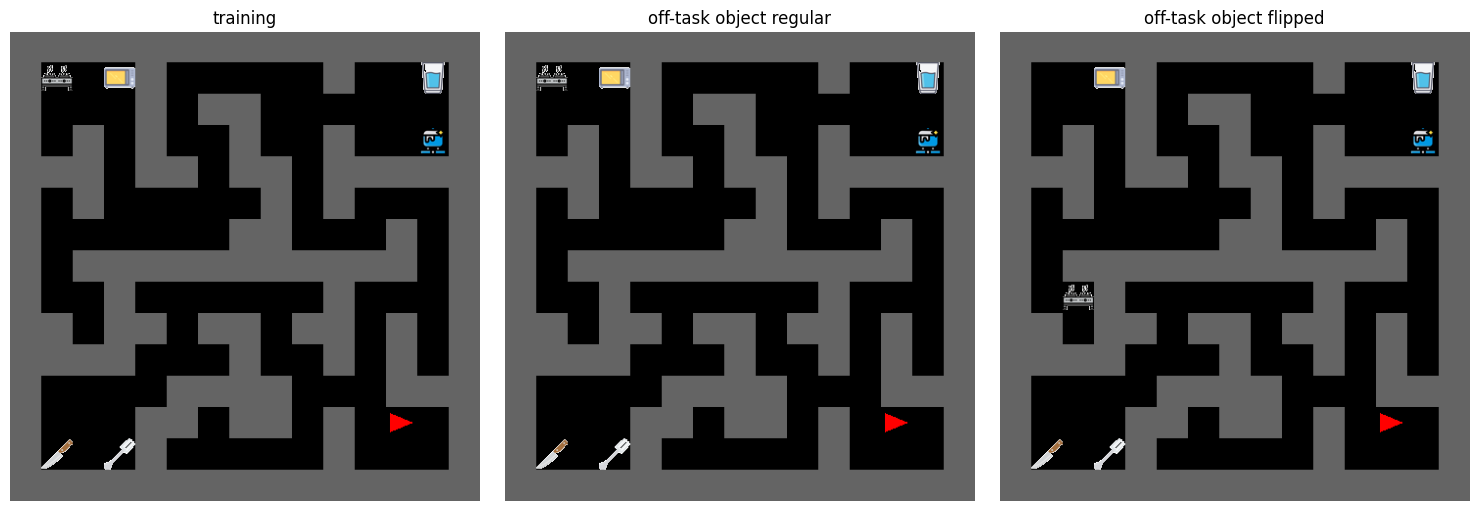

In [11]:
from IPython.display import display, Markdown
from nicewebrl import stages as nice_stages

import matplotlib.pyplot as plt

def create_env_stage_figure(env_stages):
    num_stages = len(env_stages)
    fig, axes = plt.subplots(1, num_stages, figsize=(5*num_stages, 5))
    
    if num_stages == 1:
        axes = [axes]  # Make axes iterable if there's only one subplot
    
    rng = jax.random.PRNGKey(42)
    
    for ax, stage in zip(axes, env_stages):
        timestep = stage.web_env.reset(rng, stage.env_params)
        image = experiment.render_fn(timestep)
        
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(stage.metadata.get('desc', None) or stage.name, wrap=True)
    
    plt.tight_layout()
    return fig


for block in experiment.all_blocks[2:]:
    display(Markdown(f"# Manipulation {block.metadata['manipulation']}:"))
    display(Markdown(f"## {block.metadata['desc']}"))
    env_stages = [stage for stage in block.stages if isinstance(stage, nice_stages.EnvStage)]
    # [print(stage.metadata) for stage in block.stages]
    create_env_stage_figure(env_stages)
    plt.show()


In [10]:
rng = jax.random.PRNGKey(42)
stage = env_stages[0]
timestep = stage.web_env.reset(rng, stage.env_params)
image = experiment.render_fn(timestep)